In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import urllib
import sklearn
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import value_counts as pdc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import coo_matrix
from sklearn.utils import resample
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
fintec = pd.read_csv('./behavioral.csv')

In [3]:
fintec

,REPURCHASE,CLIENT_INCOME,S01,S02,S03,S04,S05,S06,S07,S08,...,AHa_his,AHb,AHb_his,AHc,AHc_his,AHd,AHd_his,VIP,DIGI_FLG,TOPCARD
0,0,-0.078708,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
1,0,0.964541,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,0,-0.287358,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,-0.287358,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,-0.078708,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,1,-0.287358,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
95404,0,-0.287358,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
95405,0,-0.287358,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
95406,1,0.338591,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [4]:
fintec.REPURCHASE.value_counts()

0    85311
1    10097
Name: REPURCHASE, dtype: int64

In [5]:
fintec.columns[1 : 70]

Index(['CLIENT_INCOME', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08',
       'S09', 'S10', 'SIN', 'SIN_his', 'REG', 'REG_his', 'ILP', 'ILP_his',
       'AHa', 'AHa_his', 'AHb', 'AHb_his', 'AHc', 'AHc_his', 'AHd', 'AHd_his',
       'VIP', 'DIGI_FLG', 'TOPCARD'],
      dtype='object')

In [6]:
#fin = fintec.to_numpy()

In [7]:
X = fintec.drop('REPURCHASE',axis=1)

In [8]:
y = fintec['REPURCHASE']

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [10]:
train_data = pd.concat([X_train, y_train], axis=1)

In [11]:
negative = train_data[train_data.REPURCHASE==0]
positive = train_data[train_data.REPURCHASE==1]

In [12]:
neg_downsampled = resample(negative,replace=True,n_samples=(len(positive)), random_state=27)

In [13]:
downsampled = pd.concat([positive, neg_downsampled])

In [14]:
downsampled.REPURCHASE.value_counts()

1    6750
0    6750
Name: REPURCHASE, dtype: int64

In [15]:
downsampled

,CLIENT_INCOME,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,AHb,AHb_his,AHc,AHc_his,AHd,AHd_his,VIP,DIGI_FLG,TOPCARD,REPURCHASE
45086,-0.036978,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
10630,0.338591,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
51343,-0.162168,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
53108,0.964541,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
80740,-0.036978,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31962,0.547241,0,0,0,0,0,0,1,0,0,...,1,1,1,1,0,0,0,0,0,0
10821,-0.287358,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6203,-0.078708,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
9036,0.004752,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0


In [16]:
#Result ="./ReSample.csv"
#df_SAMPLE = pd.DataFrame.from_dict(downsampled)
#df_SAMPLE.to_csv( Result  , index=False )
#print( '成功產出'+Result )

In [17]:
names = downsampled.columns[0:69]

In [18]:
X = downsampled.drop('REPURCHASE',axis=1)

In [19]:
y = downsampled['REPURCHASE']

In [20]:
RE_X = X.to_numpy()

In [21]:
RE_y = y.to_numpy()

In [22]:
#X = fin[:,1:70]
#y = fin[:,0:1]
#names = fintec.columns[1 : 70]

In [23]:
print (RE_X.shape)

(13500, 28)


In [24]:
print (RE_y.shape)

(13500,)


In [25]:
#print (names.shape)

In [26]:
#names


In [27]:
X_train, X_test, y_train, y_test=train_test_split(RE_X,RE_y,test_size=0.4)

In [28]:
len(X_train)

8100

In [29]:
len(X_test)

5400

In [30]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [500], 'max_depth':[10], 'criterion' : ["gini", "entropy"] , 'max_features' :["auto","sqrt", "log2"]}
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 2, n_jobs=-1)
grid_search.fit(X_train,y_train.ravel())





GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]})

In [31]:
best_para1 = grid_search.best_params_['n_estimators']
print('n_estimators:', best_para1)
best_para2 = grid_search.best_params_['max_depth']
print('max_depth:', best_para2)
best_para3 = grid_search.best_params_['criterion']
print('criterion:', best_para3)
best_para4 = grid_search.best_params_['max_features']
print('max_features:', best_para4)
print("Best score: %0.3f" % grid_search.best_score_)   


n_estimators: 500
max_depth: 10
criterion: gini
max_features: auto
Best score: 0.657


In [32]:
rfc = RandomForestClassifier(n_estimators = best_para1 ,max_depth = best_para2, criterion = best_para3, max_features= best_para4)
rfc.fit(X_train,y_train.ravel())
y_predict = rfc.predict(X_test)
print('training score: ',rfc.score(X_train,y_train.ravel()))
print('testing score: ',rfc.score(X_test,y_test))

training score:  0.705679012345679
testing score:  0.6485185185185185


In [33]:
feature_importances_ = {}
_feat_labels = names
_importances = rfc.feature_importances_

In [34]:
indices = np.argsort(_importances)[::-1]

In [35]:
for f in range(RE_X.shape[1]):
    feature_importances_.update({_feat_labels[indices[f]]:_importances[indices[f]]})

In [36]:
feature_importances_

{'CLIENT_INCOME': 0.35419066626365464,
 'S10': 0.086697030876793,
 'S09': 0.04314703727545569,
 'SIN_his': 0.03763430083590618,
 'AHb_his': 0.0352242073599537,
 'SIN': 0.032083624245639604,
 'S02': 0.03181749083794365,
 'S01': 0.03164065424984281,
 'AHb': 0.03033256478701122,
 'ILP_his': 0.029803958341407696,
 'S04': 0.0292753380350334,
 'ILP': 0.02473008186598445,
 'REG': 0.02200398759797719,
 'REG_his': 0.02153451731812073,
 'AHd_his': 0.020102148053242907,
 'S07': 0.018588784188405247,
 'VIP': 0.0176367192250176,
 'DIGI_FLG': 0.01732137179161833,
 'AHd': 0.016065114206553616,
 'S03': 0.014901851532362426,
 'S08': 0.014399340754004408,
 'AHc_his': 0.011390133199425296,
 'AHc': 0.011351639937618606,
 'S06': 0.01085545522343108,
 'AHa': 0.010592646554289408,
 'S05': 0.01038006096014542,
 'AHa_his': 0.008666383886081645,
 'TOPCARD': 0.00763289059708}

In [37]:
np.set_printoptions(threshold= sys.maxsize)

In [38]:
print (y_predict.shape)

(5400,)


In [39]:
y_test_re = y_test.reshape(-1)

In [40]:
shoot_times=0
shooted_num=0
target=0

In [42]:
for i in range (0,4050):
    
    if y_predict[i] == 1:
     shoot_times = shoot_times + 1

    if y_test_re[i] == y_predict[i] == 1:
     shooted_num = shooted_num + 1
    
    if y_test_re[i] == 1:
     target = target + 1

In [43]:
print("repurchase customer :",target)
print("predict repurchase customer :",shoot_times)
print("actuallyrepurchase customer :",shooted_num)
#print(shooted_num/shoot_times*100,'%')
print("actuallyrepurchase",(shooted_num/2036)*100,'%')

repurchase customer : 2000
predict repurchase customer : 2227
actuallyrepurchase customer : 1393
actuallyrepurchase 68.41846758349706 %


 1) CLIENT_INCOME                  0.354191
 2) S10                            0.086697
 3) S09                            0.043147
 4) SIN_his                        0.037634
 5) AHb_his                        0.035224
 6) SIN                            0.032084
 7) S02                            0.031817
 8) S01                            0.031641
 9) AHb                            0.030333
10) ILP_his                        0.029804
11) S04                            0.029275
12) ILP                            0.024730
13) REG                            0.022004
14) REG_his                        0.021535
15) AHd_his                        0.020102
16) S07                            0.018589
17) VIP                            0.017637
18) DIGI_FLG                       0.017321
19) AHd                            0.016065
20) S03                            0.014902
21) S08                            0.014399
22) AHc_his                        0.011390
23) AHc                         

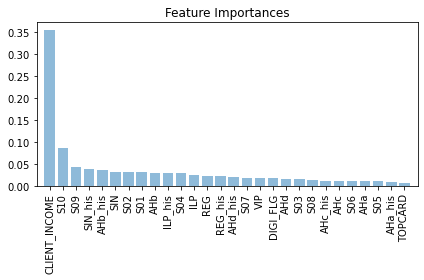

In [44]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            _feat_labels[indices[f]], 
                            _importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        _importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()